In [1]:
import time
import os
import sys

import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import stats, wcs
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel

from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector
from mmtwfs.telescope import MMT
import poppy
import photutils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append("/Users/tim/src/cwfs/python")
%cd /Users/tim/MMT/mmirs/2019.0115/

/Users/tim/MMT/mmirs/2019.0115


In [4]:
from lsst.cwfs.instrument import Instrument
from lsst.cwfs.algorithm import Algorithm
from lsst.cwfs.image import Image, readFile
import lsst.cwfs.plots as plots

In [40]:
6.5024 * 2.85  # effective focal length for MMIRS's f/2.85 imaging

18.53184

In [39]:
2.85**2 / 1.25**2 * .5e-3  # MMIRS images at f/2.85 and we used +/- 500 um focus offsets

0.0025992000000000003

In [47]:
(10246.1 - 9245.18) / 2

500.46000000000004

In [ ]:
2.85**2 / 1.25**2 * .5e-3  # MMIRS images at f/2.85 and we used +/- 500 um focus offsets

In [54]:
extra_whole = fits.open("tyc3778-00232-1.5988.fits")[3].data
intra_whole = fits.open("tyc3778-00232-1.5989.fits")[3].data
extra = extra_whole[975-40:975+40, 994-40:994+40] - np.median(extra_whole)
intra = intra_whole[975-40:975+40, 992-40:992+40] - np.median(intra_whole)

<IPython.core.display.Javascript object>


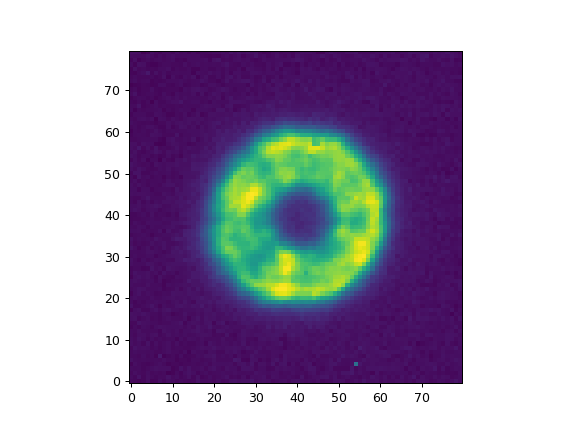

In [55]:
plt.imshow(intra, origin='lower')
plt.show()

<IPython.core.display.Javascript object>


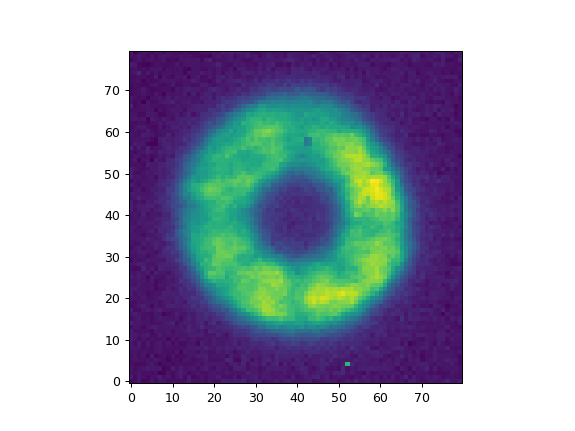

In [48]:
plt.imshow(extra, origin='lower')
plt.show()

In [56]:
fits.writeto("intra.fits", intra, overwrite=True)
fits.writeto("extra.fits", extra, overwrite=True)

In [57]:
fieldXY = [0., 0.]
I1 = Image(readFile("intra.fits"), fieldXY, Image.INTRA)
I2 = Image(readFile("extra.fits"), fieldXY, Image.EXTRA)

In [58]:
mmirs = Instrument('mmirs', I1.sizeinPix)

In [59]:
algo = Algorithm('exp', mmirs, 3)

In [61]:
algo.runIt(mmirs, I1, I2, 'onAxis')

resetting images: I1 and I2
imageCoCenter: (x1,y1)=(   41.25,   40.23)

imageCoCenter: (x1,y1)=(   40.45,   40.71)

itr = 0, z4-z22
[1109. -111.   31.  -36.   99.    7.  -35.  -17.  -19.  -18.  -28.    3.
    4.   -6.    9.   16.   14.   -5.  -64.]
itr = 1, z4-z22
[1261. -141.    6.  -48.  122.   24.  -27.  -21.  -20.  -19.  -28.   -3.
    6.    3.    9.   15.   11.   -0.  -26.]
itr = 2, z4-z22
[1363. -159.   -8.  -28.  110.   26.  -37.  -17.  -18.  -16.  -20.   -2.
    5.   -7.   11.   16.   10.   -5.  -12.]
itr = 3, z4-z22
[1412. -180.  -18.  -36.  117.   25.  -38.  -14.  -16.  -18.  -18.   -2.
   -5.   -3.   11.   17.    9.   -6.   -4.]
itr = 4, z4-z22
[ 1.423e+03 -1.880e+02 -3.000e+01 -3.600e+01  1.240e+02  3.200e+01
 -3.300e+01 -1.100e+01 -1.700e+01 -2.100e+01 -1.900e+01 -3.000e+00
 -0.000e+00 -1.000e+00  1.000e+01  1.700e+01  8.000e+00 -4.000e+00
  1.000e+00]
itr = 5, z4-z22
[ 1.444e+03 -2.190e+02 -3.600e+01 -3.500e+01  1.070e+02  3.000e+01
 -4.200e+01 -1.100e+01 -1.900e+01 -2.30

In [62]:
zv = ZernikeVector()
zv.from_array(algo.zer4UpNm, modestart=4, normalized=True)
zv.denormalize()
zv

Fringe Coefficients
 Z04:                  2560 nm 	 Defocus (2, 0)
 Z05:                -651.1 nm 	 Primary Astig at 45° (2, -2)
 Z06:                -192.7 nm 	 Primary Astig at 0° (2, 2)
 Z07:                -94.02 nm 	 Primary Y Coma (3, -1)
 Z08:                 267.3 nm 	 Primary X Coma (3, 1)
 Z09:                 265.5 nm 	 Y Trefoil (3, -3)
 Z10:                 -64.8 nm 	 X Trefoil (3, 3)
 Z11:                -19.57 nm 	 Primary Spherical (4, 0)
 Z12:                -69.98 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:                -98.19 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:                -81.45 nm 	 X Tetrafoil (4, 4)
 Z15:                -9.731 nm 	 Y Tetrafoil (4, -4)
 Z16:                 9.091 nm 	 Secondary X Coma (5, 1)
 Z17:                 -9.74 nm 	 Secondary Y Coma (5, -1)
 Z18:                  43.8 nm 	 Secondary X Trefoil (5, 3)
 Z19:                 102.6 nm 	 Secondary Y Trefoil (5, -3)
 Z20:                 52.77 nm 	 X Pentafoil (5, 5)
 Z21:    

<IPython.core.display.Javascript object>


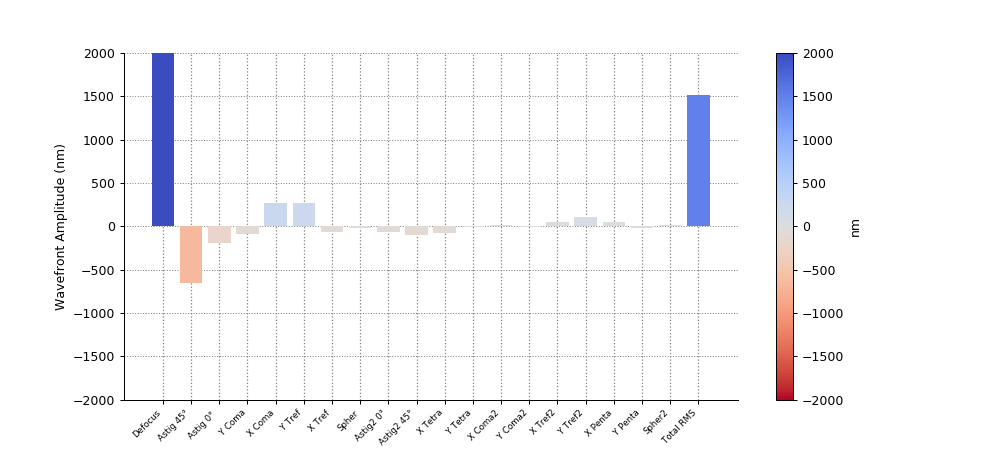

In [67]:
zv.fringe_bar_chart().show()

<IPython.core.display.Javascript object>


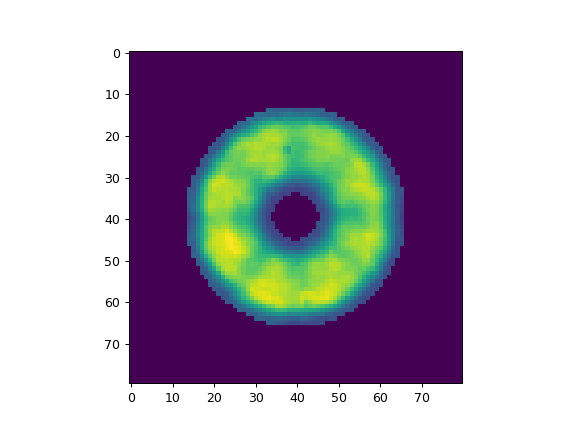

In [65]:
plt.imshow(algo.image)
plt.show()

<IPython.core.display.Javascript object>


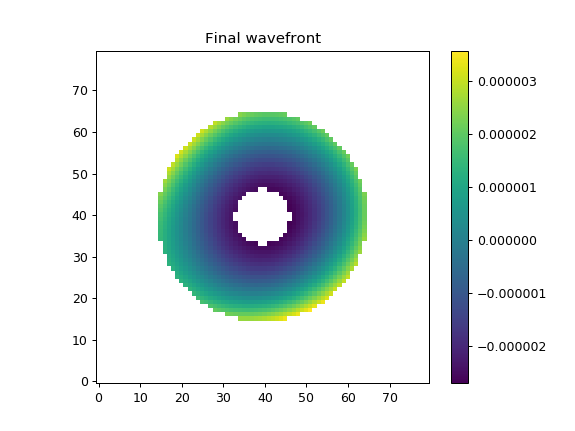

In [66]:
plots.plotImage(algo.Wconverge, "Final wavefront", show=True)